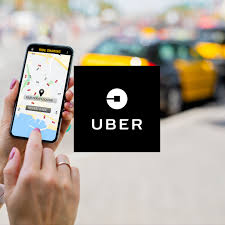

# **Uber Data Analysis**

**Uber Technologies, Inc.**, commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

## **Project Objective**

The objective of this project is to analyze Uber ride data to understand travel behavior, peak usage hours, trip purposes, and popular locations, helping Uber optimize operations and improve customer experience.

## **Dataset Overview**

- START_DATE*  -  	Trip start date & time

---

- END_DATE*   -   	Trip end date & time

---

- CATEGORY*   -  	Business / Personal

---

- START*	    -    Starting location

---

- STOP*	     -     Ending location

---

- MILES*	   -     Distance traveled

---

- PURPOSE*	   -   Purpose of trip

---



In [66]:
# Dataset Link :- https://docs.google.com/spreadsheets/d/1WOhmpuJ4N9BCh-onyknPtO3aCWMobm3nw8cxTmYF7t0/edit?usp=sharing
# Google Colab file Link :- https://colab.research.google.com/drive/1LksSlL9HIiKHjLLqNnCgkEMJGLWRUwqF?usp=sharing

# **Importing Libraries and Loading the Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1WOhmpuJ4N9BCh-onyknPtO3aCWMobm3nw8cxTmYF7t0/export?format=csv'

uber_df = pd.read_csv(url)
uber_df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


## **Exploratory Data Analysis**

- Create a copy of dataset.

In [3]:
df = uber_df.copy()
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 1,156 
Number of columns: 7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.isna().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.nunique()

,0
START_DATE,1155
END_DATE,1154
CATEGORY,2
START,177
STOP,188
MILES,257
PURPOSE,10


In [9]:
df["CATEGORY"].value_counts()

,count
CATEGORY,
Business,1078
Personal,77


* Business trips account for approximately 93% of all records, indicating that the dataset is heavily skewed toward corporate travel behavior.
* As a result, insights derived from this dataset primarily reflect business user patterns rather than general consumer behavior.


In [10]:
df["PURPOSE"].value_counts()

,count
PURPOSE,
Meeting,187
Meal/Entertain,160
Errand/Supplies,128
Customer Visit,101
Temporary Site,50
Between Offices,18
Moving,4
Airport/Travel,3
Commute,1


**Dataset Structure & Characteristics**

- The dataset contains 1,156 rows and 7 columns, representing Uber trips recorded over the year 2016.
- Each row corresponds to an individual Uber trip with information about trip timing, location, distance, category, and purpose.
- Only one numerical column (MILES) exists in the dataset. All other columns are of object type, including date and time fields (START_DATE, END_DATE).
- The PURPOSE column has 503 missing values, accounting for a significant portion of the dataset. Other columns such as END_DATE, CATEGORY, START, and STOP each have 1 missing value, which is negligible.
- The dataset contains 1 duplicate row.
- Location names include entries like “Unknown Location” and encoding issues such as “Kar?chi”, highlighting the need for text cleaning.

#### **Business Insights**
- START_DATE & END_DATE represent the trip start and end timestamps and enable time-based trend analysis.
- CATEGORY indicates whether the trip was Business or Personal.
- START and STOP capture boarding and drop-off locations, useful for location popularity analysis.
- MILES measures trip distance and helps understand travel length behavior.
- PURPOSE explains the intent behind trips and provides behavioral insights.

## **Data Cleaning & Preprocessing**

**Removing duplicate and non-analytical rows ensures that frequency-based and aggregate metrics are not artificially inflated.**

In [11]:
df = df[df['START_DATE'] != 'Totals']

- Removed 1 non-transactional record

- Dataset now contains only real trip-level data

In [12]:
df = df.drop_duplicates()

- Duplicate record removed to prevent biased counts and aggregations.

**Datetime conversion enables advanced temporal analysis such as peak hour identification, weekday trends, and monthly travel patterns.**


In [13]:
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

- Date columns successfully converted

- Enables extraction of hour, day, weekday, month

- errors='coerce' ensures invalid entries become NaT

**Replacing missing PURPOSE values with 'Unknown' preserves nearly 43% of the dataset that would otherwise be lost.**

In [14]:
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

- PURPOSE has a large number of missing values.
- Preserved dataset size while retaining analytical value
- Avoided deleting ~43% of data due to missing PURPOSE

**Standardizing location names prevents duplicate categories caused by encoding inconsistencies and improves the accuracy of location-based insights.**

In [15]:
import re
text_error_in_start = df['START'].str.contains(r'[^a-zA-Z\s]', regex = True, na = False)
df[text_error_in_start][['START']].value_counts()

,count
START,
Kar?chi,27
R?walpindi,11
Fuquay-Varina,1
Hell's Kitchen,1
Wake Co.,1


In [16]:
df['START'] = df['START'].replace(
    {'Kar?chi' : 'Karachi',
    'R?walpindi' : 'Rawalpindi',
    'Wake Co.' : 'Wake Country'})

In [17]:
text_error_in_stop = df['STOP'].str.contains(r'[^a-zA-Z\s]', regex = True, na = False)
df[text_error_in_stop][['STOP']].value_counts()

,count
STOP,
Kar?chi,26
R?walpindi,13
Gramercy-Flatiron,1
Fuquay-Varina,1
Hell's Kitchen,1
Wake Co.,1


In [18]:
df['STOP'] = df['STOP'].replace(
    {'Kar?chi' : 'Karachi',
    'R?walpindi' : 'Rawalpindi',
    'Wake Co.' : 'Wake Country'})

* Standardized text fields for accurate grouping.

**Trip duration was calculated using START_DATE and END_DATE to understand how long users typically travel with Uber.**

**Additional time-based features such as hour, day, weekday, and month were extracted from START_DATE to support temporal trend analysis.**

In [19]:
df['START_HOUR'] = df['START_DATE'].dt.hour
df['START_DAY'] = df['START_DATE'].dt.day_name()
df['START_MONTH'] = df['START_DATE'].dt.month_name()

df['TRIP_DURATION_MINS'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

**Although exact trip start hours were extracted for granular analysis, trips were also grouped into broader time-of-day categories (Morning, Afternoon, Evening, Night).**

In [20]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TIME_OF_DAY'] = df['START_HOUR'].apply(time_of_day)

In [21]:
df[df['TRIP_DURATION_MINS'] <= 0]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_HOUR,START_DAY,START_MONTH,TRIP_DURATION_MINS,TIME_OF_DAY
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Unknown,17,Tuesday,September,0.0,Evening
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Unknown,7,Friday,September,0.0,Morning
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Unknown,15,Saturday,October,0.0,Afternoon
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,Unknown,13,Thursday,October,0.0,Afternoon


In [22]:
df = df[df['TRIP_DURATION_MINS'] > 0]

- A small number of trips were found to have zero trip duration, where the start and end timestamps were identical.
- These records are logically inconsistent, especially in cases where non-zero distances were recorded.

**Since these entries represent less than 1% of the dataset and may distort duration-based analysis, they were removed to maintain data accuracy and analytical reliability.**

In [23]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_HOUR,START_DAY,START_MONTH,TRIP_DURATION_MINS,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Friday,January,6.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,1,Saturday,January,12.0,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Saturday,January,13.0,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Tuesday,January,14.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Wednesday,January,67.0,Afternoon


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   START_DATE          1150 non-null   datetime64[ns]
 1   END_DATE            1150 non-null   datetime64[ns]
 2   CATEGORY            1150 non-null   object        
 3   START               1150 non-null   object        
 4   STOP                1150 non-null   object        
 5   MILES               1150 non-null   float64       
 6   PURPOSE             1150 non-null   object        
 7   START_HOUR          1150 non-null   int32         
 8   START_DAY           1150 non-null   object        
 9   START_MONTH         1150 non-null   object        
 10  TRIP_DURATION_MINS  1150 non-null   float64       
 11  TIME_OF_DAY         1150 non-null   object        
dtypes: datetime64[ns](2), float64(2), int32(1), object(7)
memory usage: 112.3+ KB


#### **Business Insights for New Columns**
- START_HOUR captures the hour of trip initiation, enabling peak usage analysis and optimizing resource allocation based on time-of-day demand patterns.
- START_DAY identifies the day of the week for trip commencement, revealing weekly travel patterns and helping schedule maintenance during low-usage periods.
- START_MONTH tracks the month of travel activity, supporting seasonal trend analysis and long-term planning for fleet management and budget allocation.
- TRIP_DURATION_MINS quantifies actual trip time in minutes, distinguishing between distance-based and time-based travel efficiency for operational optimization.
- TIME_OF_DAY categorizes trips into intuitive time segments (Morning, Afternoon, Evening, Night), facilitating shift planning and targeted service improvements.

## **Statistical Summary & Correlation Analysis**

In [25]:
df[['MILES', 'TRIP_DURATION_MINS']].describe()

,MILES,TRIP_DURATION_MINS
count,1150.000000,1150.000000
mean,10.538957,23.322609
std,21.552360,27.343117
min,0.500000,1.000000
25%,2.900000,10.000000
50%,6.000000,16.500000
75%,10.400000,28.000000
max,310.300000,336.000000


The statistical summary highlights :-

- The typically trip distance ( median ) is around 6 miles, while the mean is higher at approximately 10.5 miles, indicating a right-skewed distribution.
- A similar pattern is observed for trip duration, where most trips are relatively short, but a few long trips increase the overall average.
- Extreme values, such as trips exceeding 300 miles or lasting several hours, are rare but significantly influence mean-based metrics.


In [26]:
df[['MILES', 'TRIP_DURATION_MINS']].corr()

,MILES,TRIP_DURATION_MINS
MILES,1.000000,0.847337
TRIP_DURATION_MINS,0.847337,1.000000


**A strong positive correlation (≈0.85) exists between trip distance and trip duration.**

- This confirms that longer distances generally require more travel time, which aligns with real-world expectations.

- Correlation analysis was limited to these variables due to the predominantly categorical nature of the dataset.

- Categorical relationships are better explored using group-based comparisons and visual analysis.


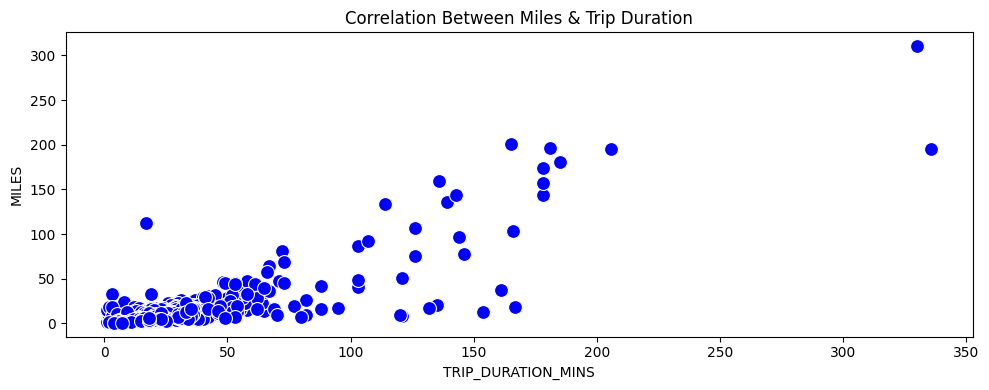

In [27]:
plt.figure(figsize=(10,4))
sns.scatterplot(x = 'TRIP_DURATION_MINS', y = 'MILES', data=df, s=100, color = 'blue')
plt.xlabel('TRIP_DURATION_MINS')
plt.ylabel('MILES')
plt.title('Correlation Between Miles & Trip Duration')
plt.tight_layout()
plt.show()

* A scatter plot was used to visually validate the relationship between trip distance and duration. Due to the density of data points, the plot primarily serves as a confirmation of the correlation coefficient rather than a standalone insight.

#### **Hypothesis Test 1**
Do Business Trips Cover Longer Distances Than Personal Trips?

- $H_0$ (Null Hypothesis): There is no significant difference in average trip distance between business and personal trips.

- $H_A$ (Alternative Hypothesis): Business trips have a significantly different average distance compared to personal trips.

In [28]:
from scipy.stats import mannwhitneyu
business_miles = df[df['CATEGORY'] == 'Business']['MILES']
personal_miles = df[df['CATEGORY'] == 'Personal']['MILES']

stats, p_value = mannwhitneyu(business_miles, personal_miles, alternative='two-sided')
print(f'Statistics = {stats}')
print(f'P_value = {p_value}')

Statistics = 48029.0
P_value = 0.017007470231633754


In [29]:
print(f'Business Miles Median = {business_miles.median()}')
print(f'Personal Miles Median = {personal_miles.median()}')

Business Miles Median = 6.1
Personal Miles Median = 4.2


* A Mann–Whitney U test was conducted to compare trip distances between business and personal users.

* **The test resulted in a p-value of 0.017, which is below the 0.05 significance threshold.** This indicates a statistically significant difference in trip distance between the two categories.

* Further inspection of median values shows that business trips tend to cover longer distances than personal trips. This suggests that business usage of Uber often involves longer or more frequent inter-city or client-related travel.


#### **Hypothesis Test 2**
Does Trip Duration Differ by Time of Day?
* $H_0$ -> There is no significant difference in trip duration across different times of day.
* $H_A$ -> At least one time-of-day category has a significantly different trip duration.

In [30]:
from scipy.stats import kruskal

groups = [
    df[df['TIME_OF_DAY'] == 'Morning']['TRIP_DURATION_MINS'],
    df[df['TIME_OF_DAY'] == 'Afternoon']['TRIP_DURATION_MINS'],
    df[df['TIME_OF_DAY'] == 'Evening']['TRIP_DURATION_MINS'],
    df[df['TIME_OF_DAY'] == 'Night']['TRIP_DURATION_MINS']
]

k_stat, k_p_value = kruskal(*groups)
print(f'Statistics = {k_stat}')
print(f'P-Value = {k_p_value}')

Statistics = 13.02547395786485
P-Value = 0.004581839144141768


* A Kruskal–Wallis test was used to assess whether trip duration varies across different times of day.

* **The test produced a p-value of 0.0046, indicating a statistically significant difference in trip duration across time-of-day categories.**

While this test does not identify which specific periods differ, it suggests that temporal factors such as traffic conditions, demand surges, or trip purpose influence travel time. Further visual analysis will explore these differences in detail.

## **Graphical Analysis**

### **Univariate Analysis**

#### **Trip Distance (MILES)**
Q. To understand how far people typically travel using Uber.

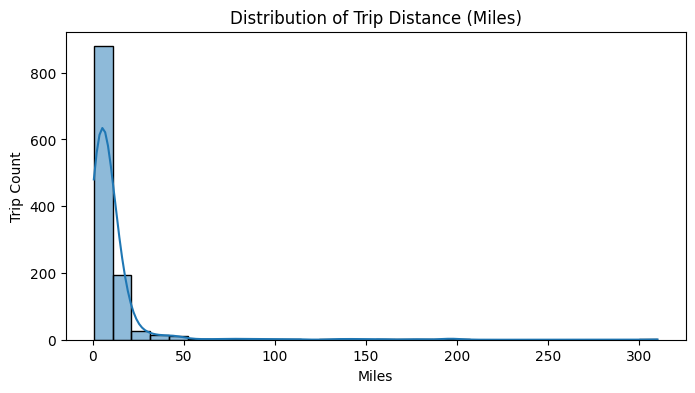

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(df['MILES'], bins=30, kde=True)
plt.title('Distribution of Trip Distance (Miles)')
plt.xlabel('Miles')
plt.ylabel('Trip Count')
plt.show()

- Most Uber trips are short-distance, with a heavy concentration below 10 miles.
- The distribution is strongly right-skewed, indicating that while long-distance trips exist, they are relatively rare.
- This confirms that Uber is primarily used for short urban travel rather than long-haul transportation.

#### **Trip Duration (TRIP_DURATION_MINS)**
Q. How long do people travel with Uber ?

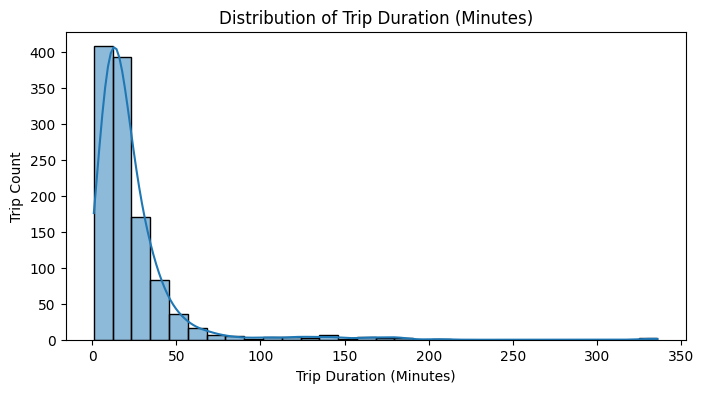

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(df['TRIP_DURATION_MINS'], bins=30, kde=True)
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Trip Count')
plt.show()

- The majority of Uber trips last less than 30 minutes.
- A small number of long-duration trips extend beyond one hour, contributing to the right-skewed distribution.
- This suggests that Uber mainly supports quick point-to-point travel within cities.

#### **Category (Business vs Personal)**

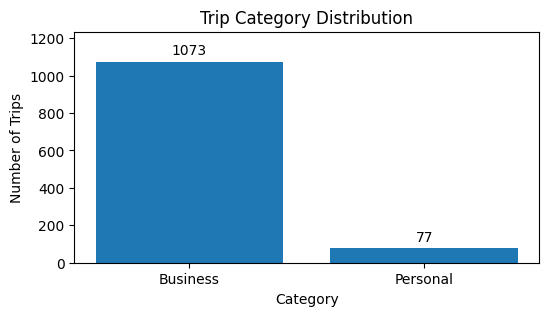

In [53]:
category_counts = df['CATEGORY'].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(category_counts.index, category_counts.values)
plt.title('Trip Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Trips')
plt.ylim(0, max(category_counts.values) * 1.15)

for i, v in enumerate(category_counts.values):
    plt.text(i, v + 0.02 * max(category_counts.values), str(v),
             ha='center', va='bottom')

plt.show()

- Business trips dominate (93.3%) the dataset, accounting for the vast majority of recorded rides.
- This indicates that the observed travel patterns are heavily influenced by professional usage rather than personal or leisure travel.

#### **Purpose**

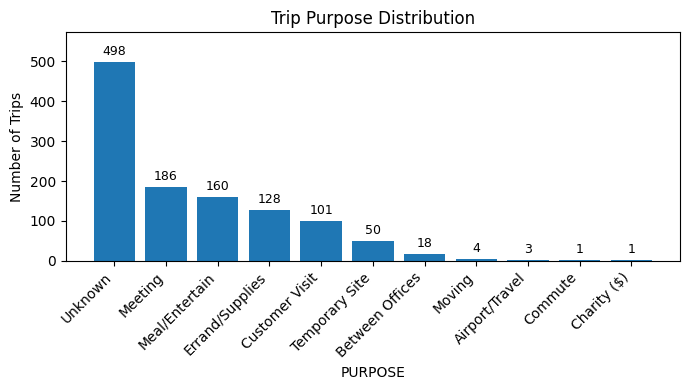

In [47]:
purpose_counts = df['PURPOSE'].value_counts()

plt.figure(figsize=(7,4))
bars = plt.bar(purpose_counts.index, purpose_counts.values)
plt.title('Trip Purpose Distribution')
plt.xlabel('PURPOSE')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(purpose_counts.values) * 1.15)

for i, v in enumerate(purpose_counts.values):
  plt.text(i, v + 0.02 * max(purpose_counts.values), str(v),
             ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

- Meeting-related (16.17 %) trips are the most frequent recorded purpose, followed by meal-related (13.91 %) and errand trips (11.13 %).
- A major number of trips are labeled as 'Unknown' which is (43.30 %), indicating incomplete purpose logging.
- Overall, the distribution highlights Uber’s strong role in supporting business-related activities.

#### **Time of Day**
Q. What hour / time period do most people take Uber ?

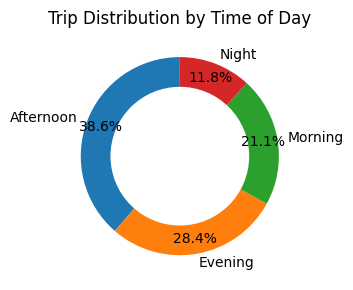

In [52]:
plt.figure(figsize=(6, 3))

time_counts = df['TIME_OF_DAY'].value_counts()
total = time_counts.sum()
percentages = (time_counts / total * 100).round(1)

plt.pie(time_counts.values, labels=time_counts.index, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Trip Distribution by Time of Day')
plt.tight_layout()
plt.show()

- Trip demand peaks during afternoon hours (38.6%) followed by evenings (28.4%), aligning with standard business schedules and post-work commuting.
- This indicates Uber serves primarily as a business transportation solution during conventional working hours, with minimal late-night or purely personal usage in this dataset.

### **Bivariate Analysis**

#### **Category vs Trip Distance**

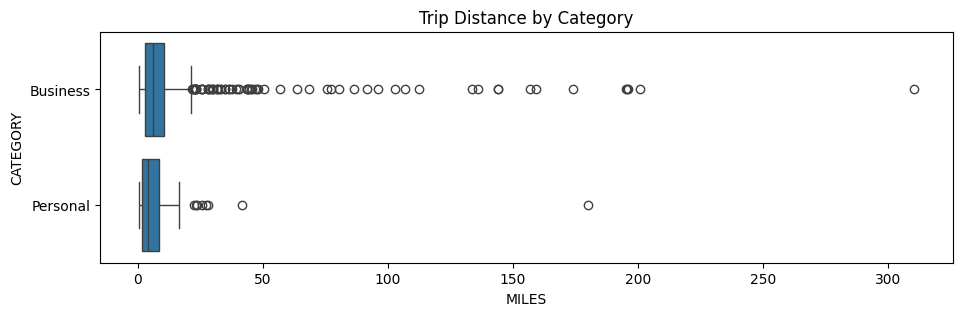

In [37]:
plt.figure(figsize=(11,3))
sns.boxplot(x='MILES', y='CATEGORY', data=df)
plt.title('Trip Distance by Category')
plt.show()

- Business trips have a higher median distance and a wider spread compared to personal trips.
- This reinforces earlier statistical findings that business usage of Uber often involves longer journeys, such as client visits or inter-office travel.

#### **Time of Day vs Trip Duration**

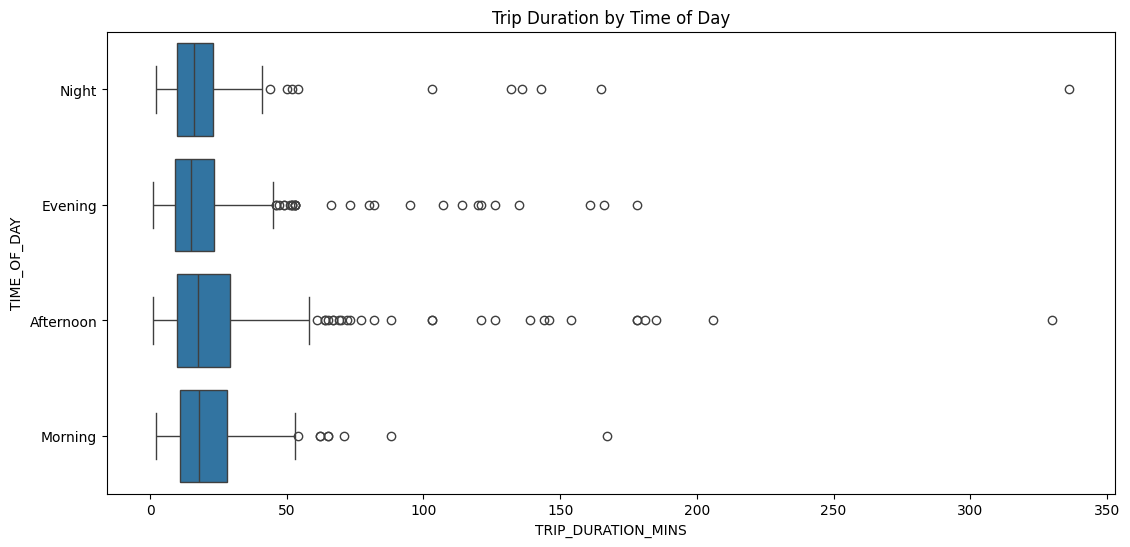

In [38]:
plt.figure(figsize=(13,6))
sns.boxplot(x='TRIP_DURATION_MINS', y='TIME_OF_DAY', data=df)
plt.title('Trip Duration by Time of Day')
plt.show()

- Trip duration varies across different times of day.
- Afternoon and Evening trips show greater variability and longer upper ranges, likely influenced by traffic congestion and commute patterns.
- Morning and Night trips tend to be relatively shorter and more consistent.

#### **Purpose vs Trip Distance**

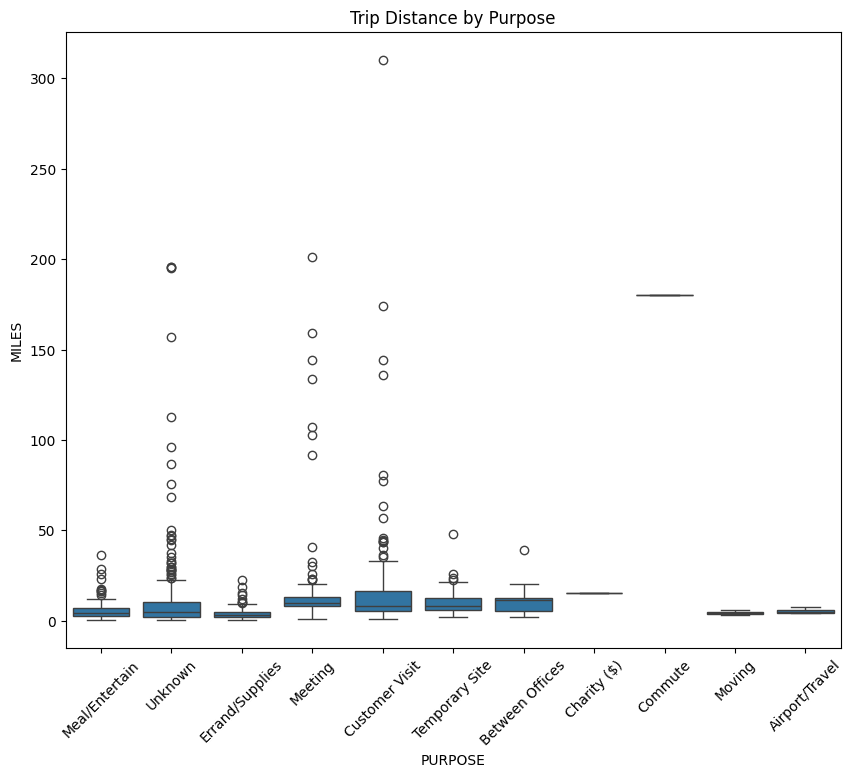

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(x='PURPOSE', y='MILES', data=df)
plt.xticks(rotation=45)
plt.title('Trip Distance by Purpose')
plt.show()

- Trips associated with customer visits, meetings, and temporary sites tend to cover longer distances.
- In contrast, errands and meal-related trips are generally shorter.
This indicates that trip purpose is a strong driver of travel distance.

### **Multivariate Analysis**
#### **Time of Day × Category × Trip Count**

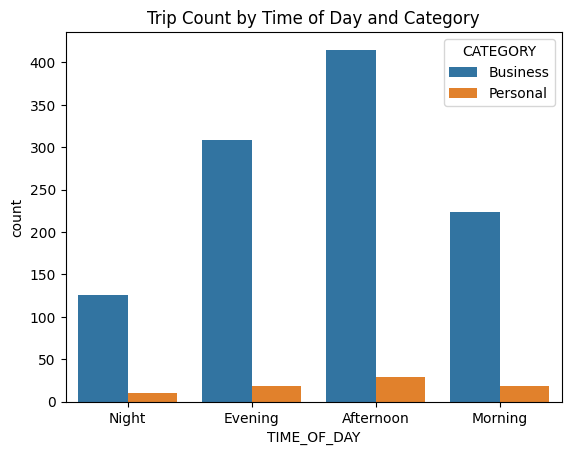

In [40]:
sns.countplot(x='TIME_OF_DAY', hue='CATEGORY', data=df)
plt.title('Trip Count by Time of Day and Category')
plt.show()

- Business trips dominate across all times of day, with the highest volume occurring during the Afternoon and Evening periods.

- Personal trips remain low throughout the day, with a slight increase in the Evening and Morning.

- This pattern indicates that Uber usage is largely driven by professional travel schedules rather than personal or leisure demand.
Operationally, this suggests that fleet availability and driver incentives should be optimized for business-heavy hours, especially in the afternoon.

#### **Time of Day × Category × Trip Duration**

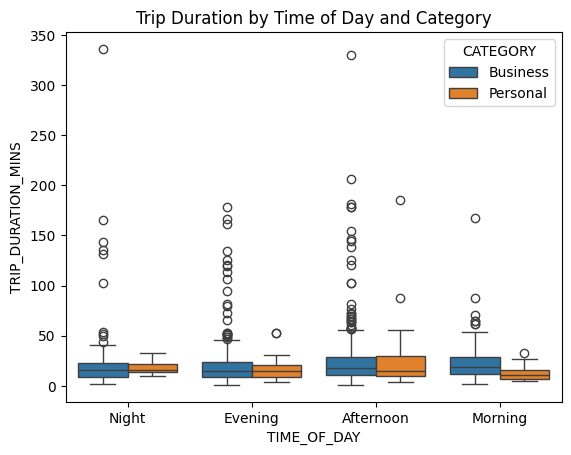

In [41]:
sns.boxplot(x='TIME_OF_DAY', y='TRIP_DURATION_MINS', hue='CATEGORY', data=df)
plt.title('Trip Duration by Time of Day and Category')
plt.show()

- Business trips consistently exhibit longer and more variable durations compared to personal trips across all times of day.

- Afternoon and Evening business trips show the widest spread, likely due to traffic congestion and longer client or inter-office travel.

- Personal trips tend to remain shorter and more consistent, indicating localized travel.

- This suggests that peak congestion management and route optimization would have the greatest impact during business-heavy time periods.

#### **Purpose × Time of Day × Distance**

In [60]:
purpose_counts = df['PURPOSE'].value_counts()
common_purposes = purpose_counts[purpose_counts >= 10].index

df[df['PURPOSE'].isin(common_purposes)] \
  .groupby(['TIME_OF_DAY', 'PURPOSE'])['MILES'].median()

TIME_OF_DAY  PURPOSE        
Afternoon    Between Offices     7.20
             Customer Visit     12.40
             Errand/Supplies     2.25
             Meal/Entertain      4.15
             Meeting            10.50
             Temporary Site      8.80
             Unknown             4.40
Evening      Between Offices    13.20
             Customer Visit      5.70
             Errand/Supplies     3.70
             Meal/Entertain      3.55
             Meeting             9.00
             Temporary Site      7.65
             Unknown             4.20
Morning      Between Offices    12.20
             Customer Visit      8.45
             Errand/Supplies     2.85
             Meal/Entertain      6.40
             Meeting            10.35
             Temporary Site      7.90
             Unknown             5.50
Night        Between Offices     4.20
             Customer Visit      3.35
             Errand/Supplies     3.10
             Meal/Entertain      5.15
             Meeting             9.90
             Temporary Site     27.30
             Unknown             7.30
Name: MILES, dtype: float64

- Trip distance varies significantly by purpose regardless of time of day.

- Customer visits and meetings consistently involve longer travel distances, reinforcing Uber’s role in professional mobility.

- Errands and meal-related trips are short-distance and local in nature.

- Temporary site trips during the night exhibit unusually high median distances, possibly reflecting inter-city or special project travel.

- Overall, trip purpose is a stronger driver of distance than time of day.

#### **Joint Plot**

Text(0.5, 1.02, 'Relationship Between Trip Duration and Distance')

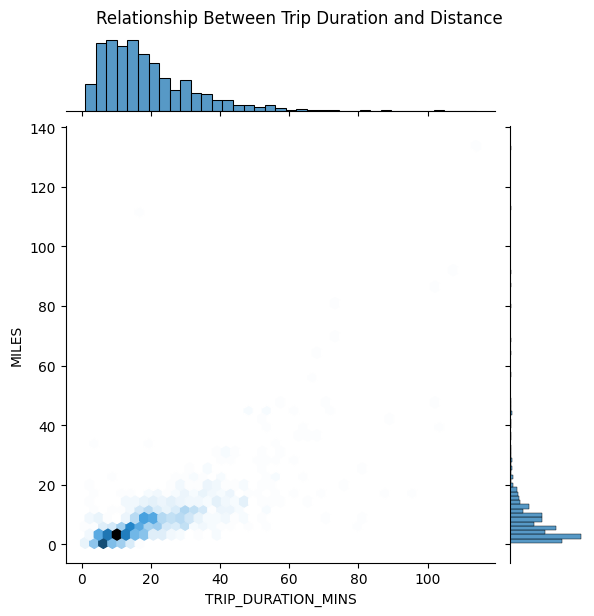

In [59]:
sns.jointplot(x='TRIP_DURATION_MINS', y='MILES', data=df[df['TRIP_DURATION_MINS'] < 120], kind='hex', height=6)
plt.suptitle('Relationship Between Trip Duration and Distance', y=1.02)

- The joint distribution of trip distance and duration shows a strong positive relationship, where longer trips generally take more time.

- Most trips cluster in the lower-left region, indicating short-distance and short-duration urban travel.

- A small number of trips fall into the long-distance, long-duration region, representing rare inter-city or extended business travel.

- This confirms that Uber primarily serves short urban mobility needs, with occasional long-haul professional usage.

### **Business Questions & Insights**
#### **Q1. How long do people travel with Uber ?**

Most Uber trips are short in duration.

- The median trip duration is approximately **16.5 minutes**, indicating that a typical Uber ride lasts under 20 minutes.
- The majority of trips fall within the **10–30 minute range**, confirming that Uber is primarily used for short urban travel.
- A small number of trips extend beyond one hour, which increases the average duration but represents rare cases.

#### **Q2. What hour / time period do most people take Uber ?**
From above charts:
- Afternoon ≈ 38.6%
- Evening ≈ 28.4%
- Morning ≈ 21.1%
- Night ≈ 11.8%

Uber demand peaks during the **Afternoon**, followed by the **Evening** period.

Afternoon trips account for the largest share of rides, indicating high usage during business hours and post-lunch travel.

#### **Q3. What is the purpose of trips ?**
The most common recorded purposes for Uber trips are **Meetings**, **Meals/Entertainment**, and **Errands**.

A significant number of trips are labeled as “Unknown”, indicating incomplete purpose capture.


#### **Q4. What is the number of trips per day, and which day has the highest number of trips ?**

In [63]:
df['START_DAY'].value_counts().sort_index()

,count
START_DAY,
Friday,205
Monday,174
Saturday,149
Sunday,148
Thursday,153
Tuesday,174
Wednesday,147


- Trip volume is relatively consistent across weekdays, with a noticeable peak on Friday.
- Weekend trip counts remain comparable to weekdays, indicating steady demand throughout the week.
- **Friday** has the highest number of Uber trips, with **205 rides**, making it the busiest day of the week.

#### **Q5. What are the trips in the month ?**

In [64]:
df['START_MONTH'].value_counts()

,count
START_MONTH,
December,146
August,133
November,122
February,115
March,113
July,112
June,107
October,104
January,61


Uber trip volume is highest in **December (146 trips)**, followed by **August (133)** and **November (122)**.

The lowest trip volume is observed in **September (34 trips)**.


#### **Q6. Where do people start boarding their trip from most ?**

In [65]:
df['START'].value_counts().head(10)

,count
START,
Cary,201
Unknown Location,146
Morrisville,85
Whitebridge,68
Islamabad,56
Durham,36
Lahore,36
Karachi,30
Raleigh,28


The most common trip starting location is **Cary**, accounting for **201 trips**, followed by **Morrisville** and **Whitebridge**.

“Unknown Location” appears frequently, indicating gaps in location data capture.


- Uber trips are predominantly short, business-driven, and concentrated during afternoon and evening hours.
- Demand remains consistent across most days, peaks on Fridays, and shows seasonal variation across months.
- Trip origins are clustered around key urban locations, highlighting strong geographic demand patterns.

## **Key Business Insights**
#### **A) Uber Is Primarily Used for Short, Urban Trips**
-  Median trip duration is ~16.5 minutes.
- Majority of trips are under 30 minutes
- Trip distances are mostly below 10 miles.

Uber is predominantly used for short-distance, point-to-point urban mobility rather than long-distance travel.

#### **B) Demand Peaks During Afternoon and Evening Hours**
Afternoon for ~39% and Evening contributes ~28% accounts of total trips. Morning and Night demand is comparatively lower.

Uber usage aligns strongly with business hours and post-work travel patterns.

#### **C) Business Trips Dominate Usage**
93% of all trips fall under the Business category. Business trips tend to cover longer distances and have higher duration variability.

Uber plays a crucial role in professional and corporate transportation.

#### **D) Fridays Are the Busiest Day**
Friday (205 trips) has the highest demand. Trip volume remains relatively stable across the week.

Demand is consistent, with a notable spike at the end of the workweek due to business wrap-ups and social activities.

#### **E) Seasonal Variations Exist**
- Highest trip volume in December, followed by August and November
- Lowest activity observed in September

Seasonal factors such as holidays, year-end activities, and business cycles influence ride demand.

#### **F) Trip Purpose Drives Distance More Than Time of Day**
- Customer visits, meetings, and temporary site trips involve longer distances
- Errands and meals are typically short-distance
- Purpose has a stronger impact on distance than time-of-day

Understanding why people travel is more predictive of trip length than when they travel.

#### **G) Demand Is Concentrated in Specific Locations**
- Cary is the most common trip starting point
- Other frequent locations include Morrisville, Whitebridge, and urban hubs
- “Unknown Location” appears frequently, indicating data gaps

Uber demand is geographically clustered, but data quality issues limit full location intelligence.

### **Business Recommendations**
#### **A) Optimize Driver Availability During Peak Hours**
- Increase driver supply during Afternoon and Evening
- Introduce targeted incentives for peak business hours

`Business Impact :-` Reduced wait times, improved customer satisfaction, and higher trip completion rates.

#### **B) Strengthen Corporate & Business Travel Programs**
- Expand Uber for Business offerings
- Offer corporate discounts or subscriptions for frequent business travelers

`Business Impact:-` Higher customer retention and increased revenue from professional users.

#### **C) Purpose-Based Service Optimization**
- Customize services for Meetings & customer visits (longer trips) and Errands & meals (short, quick rides)
- Improve in-app purpose tagging to reduce “Unknown” trips

`Business Impact:-` Better demand forecasting and more personalized user experience.

#### **D) Focus on High-Demand Days and Seasons**
- Allocate more drivers on Fridays
- Prepare seasonal strategies for high-demand months like December and August

`Business Impact:-` Improved operational efficiency during predictable demand surges.

#### **E) Improve Location Data Quality**
- Reduce “Unknown Location” through better GPS capture or mandatory location selection.
- Use high-demand pickup zones (e.g., Cary) for:
   - Driver positioning
   - Local promotions

`Business Impact:-` More accurate geographic insights and optimized fleet distribution.

#### **F) Traffic-Aware Routing & Pricing**
- Longer and more variable trip durations during peak business hours suggest congestion
- Enhance route optimization and dynamic pricing during high-traffic periods

`Business Impact:-` Reduced trip times and better fare fairness perception.

### **Limitations of the Dataset : Which I think**
- The dataset is heavily skewed toward business trips, limiting generalization to personal users.
- A significant number of trips have unknown purposes or locations.
- The data represents a single year and may not capture long-term trends.
- The analysis is observational and does not establish causality.

### **Conclusion**

This analysis reveals that Uber is primarily used for short, business-driven urban travel, with clear patterns across time, purpose, and location.

Peak demand occurs during afternoon and evening hours, especially on Fridays and in high-activity months.

By aligning driver availability, corporate offerings, and data quality improvements with these insights, Uber can enhance operational efficiency, customer experience, and revenue growth.
